In [32]:
pip install boto3

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
pip  install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import boto3
import pandas as pd
s3 = boto3.client("s3" )
bucket_name = "project-data-maiythack"
s3_object = "power.txt"
obj = s3.get_object(Bucket=bucket_name, Key=s3_object)
df = pd.read_csv(obj['Body'], sep = ";")

In [35]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [36]:
df[df.isnull().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [37]:
import numpy as np

In [38]:
df['Global_active_power'].replace('?', np.nan, inplace = True)
df['Global_reactive_power'].replace('?', np.nan, inplace = True)
df['Voltage'].replace('?', np.nan, inplace = True)
df['Global_intensity'].replace('?', np.nan, inplace = True)
df['Sub_metering_1'].replace('?', np.nan, inplace = True)
df['Sub_metering_2'].replace('?', np.nan, inplace = True)

In [39]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [41]:
pip install sklearn


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from sklearn.model_selection import train_test_split # creates training and testing data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # difference between the estimated value and true value

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [45]:
X = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', \
         'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3' ]]
imp_mean.fit(X)

SimpleImputer()

In [46]:
df2=pd.DataFrame(imp_mean.transform(X), columns=['Global_active_power', 'Global_reactive_power', \
                                                     'Voltage', 'Global_intensity', 'Sub_metering_1', \
                                                     'Sub_metering_2', 'Sub_metering_3'])

In [47]:
df2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [48]:
df2.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# Start here, these are the graphs for data with imputed mean

In [85]:
# define dependent and independent variables for global active power and sub metering 1
x_subm1 = df2['Sub_metering_1']
print(x_active.shape)

y_active = df2['Global_active_power']
print(y_subm1.shape)

(2075259, 1)
(2075259,)


In [86]:
# reshape numpy arrays of the x and y to make sure they have one column
# np.array is a collection of values of the same type, indexed by a tuple of nonnegative integers
x_subm1 = np.array(x_subm1).reshape(-1,1)
print(x_subm1.shape)

y_active = np.array(y_active).reshape(-1,1)
print(y_active.shape)

(2075259, 1)
(2075259, 1)


In [87]:
# split data to training- 80% of samples and test- 20% of samples sets
x_train_1, x_test_1, y_train_1, y_test_1 = \
    train_test_split(x_subm1, y_active, test_size = 0.2, random_state = 5)
            # random_state controls the shuffling process

print(x_train_1.shape)
print(x_test_1.shape)

(1660207, 1)
(415052, 1)


In [88]:
# trains simple model on training set for 1 independent variable
model = LinearRegression()
model.fit(x_train_1, y_train_1) # creates best approximation of the output

LinearRegression()

In [89]:
# mse: closeness of fitted line to the data points; smaller mse = closer fit to data
# rmse: square root of mse; better measure of goodness of fit
# r2: (total variance explained by the model) / total variance; coefficient of determination

# training set: trains the model
# testing set: tests whether the built model is correct or not

# key with creating training and test sets: you're predicting x
# y comes into play when computing for mse

# simple model performance for training set
y_train_predict_1 = model.predict(x_train_1)
mse = mean_squared_error(y_train_1, y_train_predict_1)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_1, y_test_1),2)

print('Simple model performance for training set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for training set:
MSE is: 28.61709483866778
RMSE is: 5.349494820884284
r2 (model) score is: 0.23


In [90]:
# simple model performance for test set
y_pred_1 = model.predict(x_test_1)
mse = mean_squared_error(y_test_1, y_pred_1)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_1, y_test_1),2)

print('Simple model performance for test set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for test set:
MSE is: 28.59887306836886
RMSE is: 5.347791419676805
r2 (model) score is: 0.23


In [91]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

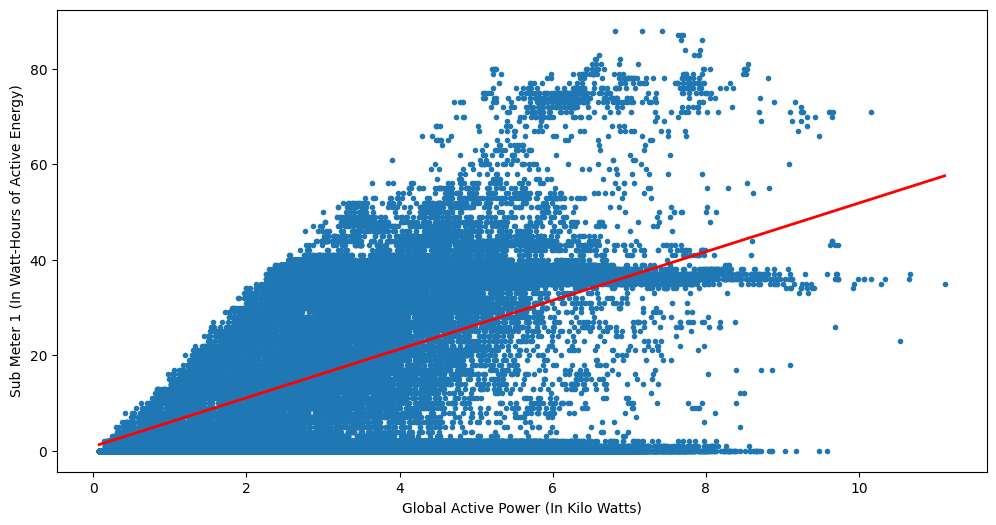

In [111]:
# plot the model fitted line
plt.figure(figsize=(12,6))
prediction_space = np.linspace(min(x_subm1), max(x_subm1)).reshape(-1,1)
    # constructs a straight line on the graph along with y_predict
    # np.linspace creates sequences of evenly spaced numbers
plt.scatter(x_subm1, y_active, marker='.')
plt.plot(prediction_space, model.predict(prediction_space), color = 'red', linewidth = 2)
plt.ylabel('Sub Meter 1 (In Watt-Hours of Active Energy)')
plt.xlabel('Global Active Power (In Kilo Watts)')
plt.show()

In [78]:
# define dependent and independent variables for global active power and sub metering 2
x_subm2 = df2['Sub_metering_2']
print(x_subm2.shape)

y_active = df2['Global_active_power']
print(y_active.shape)

(2075259,)
(2075259,)


In [79]:
# reshape numpy arrays of the x and y to make sure they have one column
# np.array is a collection of values of the same type, indexed by a tuple of nonnegative integers
x_subm2 = np.array(x_subm2).reshape(-1,1)
print(x_subm2.shape)

y_active = np.array(y_active).reshape(-1,1)
print(y_active.shape)

(2075259, 1)
(2075259, 1)


In [80]:
# split data to training- 80% of samples and test- 20% of samples sets
x_train_2, x_test_2, y_train_2, y_test_2 = \
    train_test_split(x_subm2, y_active, test_size = 0.2, random_state = 5)
            # random_state controls the shuffling process

print(x_train_2.shape)
print(x_test_2.shape)

(1660207, 1)
(415052, 1)


In [81]:
# trains simple model on training set for 1 independent variable
model = LinearRegression()
model.fit(x_train_2, y_train_2) # creates best approximation of the output

LinearRegression()

In [82]:
# mse: closeness of fitted line to the data points; smaller mse = closer fit to data
# rmse: square root of mse; better measure of goodness of fit
# r2: (total variance explained by the model) / total variance; coefficient of determination

# training set: trains the model
# testing set: tests whether the built model is correct or not

# key with creating training and test sets: you're predicting x
# y comes into play when computing for mse

# simple model performance for training set
y_train_predict_2 = model.predict(x_train_2)
mse = mean_squared_error(y_train_2, y_train_predict_2)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_2, y_test_2),2)

print('Simple model performance for training set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for training set:
MSE is: 27.143434885540785
RMSE is: 5.209936169046679
r2 (model) score is: 0.19


In [83]:
# simple model performance for test set
y_pred_2 = model.predict(x_test_2)
mse = mean_squared_error(y_test_2, y_pred_2)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_2, y_test_2),2)

print('Simple model performance for test set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for test set:
MSE is: 27.178945040303724
RMSE is: 5.213342981264874
r2 (model) score is: 0.19


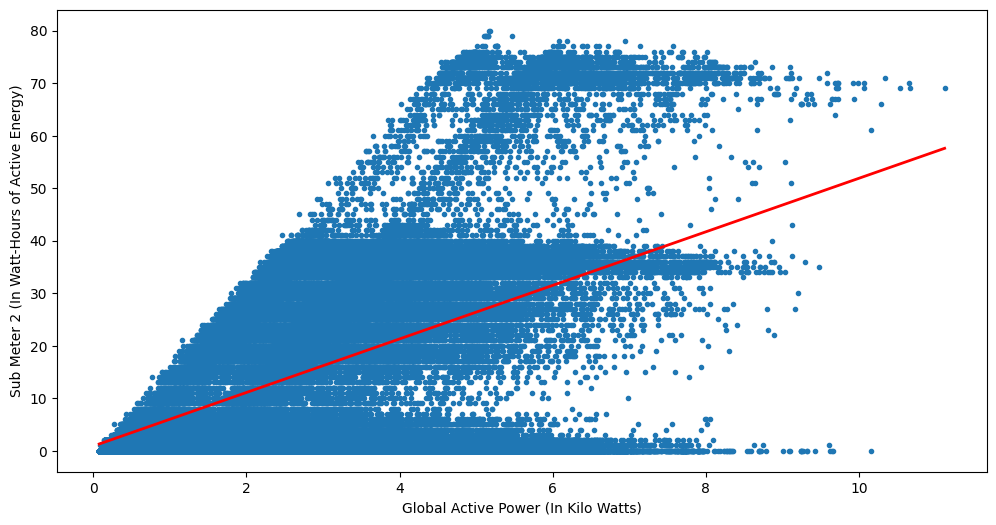

In [110]:
# plot the model fitted line
plt.figure(figsize=(12,6))
prediction_space = np.linspace(min(x_subm2), max(x_subm2)).reshape(-1,1)
    # constructs a straight line on the graph along with y_predict
    # np.linspace creates sequences of evenly spaced numbers
plt.scatter(x_subm2, y_active, marker='.')
plt.plot(prediction_space, model.predict(prediction_space), color = 'red', linewidth = 2)
plt.ylabel('Sub Meter 2 (In Watt-Hours of Active Energy)')
plt.xlabel('Global Active Power (In Kilo Watts)')
plt.show()

In [102]:
# define dependent and independent variables for global active power and sub metering 3
x_subm3 = df2['Sub_metering_3']
print(x_subm3.shape)

y_active = df2['Global_active_power']
print(y_active.shape)

(2075259,)
(2075259,)


In [103]:
# reshape numpy arrays of the x and y to make sure they have one column
# np.array is a collection of values of the same type, indexed by a tuple of nonnegative integers
x_subm3 = np.array(x_subm3).reshape(-1,1)
print(x_subm3.shape)

y_active = np.array(y_active).reshape(-1,1)
print(y_active.shape)

(2075259, 1)
(2075259, 1)


In [104]:
# split data to training- 80% of samples and test- 20% of samples sets
x_train_3, x_test_3, y_train_3, y_test_3 = \
    train_test_split(x_subm3, y_active, test_size = 0.2, random_state = 5)
            # random_state controls the shuffling process

print(x_train_3.shape)
print(x_test_3.shape)

(1660207, 1)
(415052, 1)


In [105]:
# trains simple model on training set for 1 independent variable
model = LinearRegression()
model.fit(x_train_3, y_train_3) # creates best approximation of the output

LinearRegression()

In [106]:
# mse: closeness of fitted line to the data points; smaller mse = closer fit to data
# rmse: square root of mse; better measure of goodness of fit
# r2: (total variance explained by the model) / total variance; coefficient of determination

# training set: trains the model
# testing set: tests whether the built model is correct or not

# key with creating training and test sets: you're predicting x
# y comes into play when computing for mse

# simple model performance for training set
y_train_predict_3 = model.predict(x_train_3)
mse = mean_squared_error(y_train_3, y_train_predict_3)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_3, y_test_3),2)

print('Simple model performance for training set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for training set:
MSE is: 41.63583648335525
RMSE is: 6.452583706032433
r2 (model) score is: 0.41


In [107]:
# simple model performance for test set
y_pred_1 = model.predict(x_test_3)
mse = mean_squared_error(y_test_3, y_pred_3)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_3, y_test_3),2)

print('Simple model performance for test set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for test set:
MSE is: 41.614968202219956
RMSE is: 6.450966454898053
r2 (model) score is: 0.41


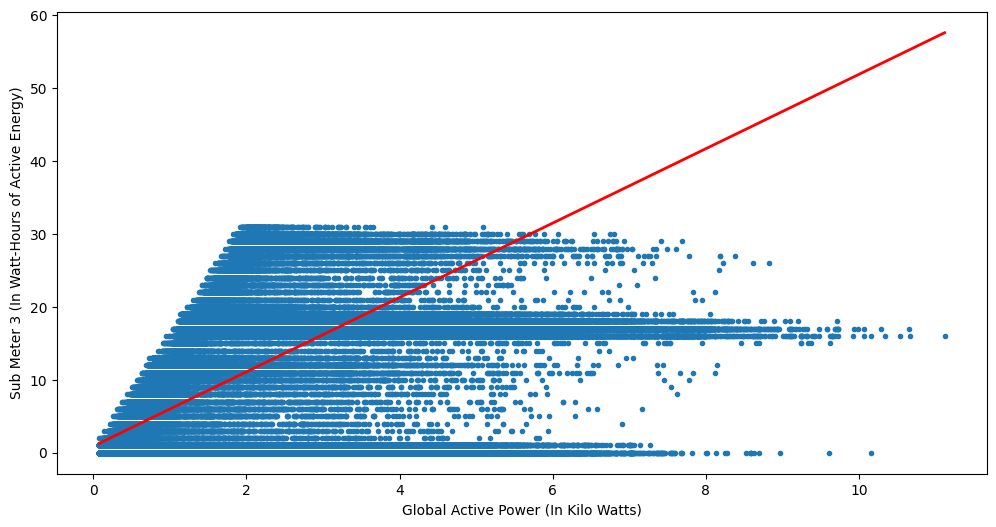

In [112]:
# plot the model fitted line
plt.figure(figsize=(12,6))
prediction_space = np.linspace(min(x_subm3), max(x_subm3)).reshape(-1,1)
    # constructs a straight line on the graph along with y_predict
    # np.linspace creates sequences of evenly spaced numbers
plt.scatter(x_subm3, y_active, marker='.')
plt.plot(prediction_space, model.predict(prediction_space), color = 'red', linewidth = 2)
plt.ylabel('Sub Meter 3 (In Watt-Hours of Active Energy)')
plt.xlabel('Global Active Power (In Kilo Watts)')
plt.show()

In [114]:
# define dependent and independent variables for global reactive power and sub metering 1
x_subm1_2 = df2['Sub_metering_1']
print(x_subm1_2.shape)

y_reactive = df2['Global_reactive_power']
print(y_reactive.shape)

(2075259,)
(2075259,)


In [115]:
# reshape numpy arrays of the x and y to make sure they have one column
# np.array is a collection of values of the same type, indexed by a tuple of nonnegative integers
x_subm1_2 = np.array(x_subm1_2).reshape(-1,1)
print(x_subm1_2.shape)

y_reactive = np.array(y_reactive).reshape(-1,1)
print(y_reactive.shape)

(2075259, 1)
(2075259, 1)


In [116]:
# split data to training- 80% of samples and test- 20% of samples sets
x_train_4, x_test_4, y_train_4, y_test_4 = \
    train_test_split(x_subm1_2, y_reactive, test_size = 0.2, random_state = 5)
            # random_state controls the shuffling process

print(x_train_4.shape)
print(x_test_4.shape)

(1660207, 1)
(415052, 1)


In [117]:
# trains simple model on training set for 1 independent variable
model = LinearRegression()
model.fit(x_train_4, y_train_4) # creates best approximation of the output

LinearRegression()

In [118]:
# mse: closeness of fitted line to the data points; smaller mse = closer fit to data
# rmse: square root of mse; better measure of goodness of fit
# r2: (total variance explained by the model) / total variance; coefficient of determination

# training set: trains the model
# testing set: tests whether the built model is correct or not

# key with creating training and test sets: you're predicting x
# y comes into play when computing for mse

# simple model performance for training set
y_train_predict_4 = model.predict(x_train_4)
mse = mean_squared_error(y_train_4, y_train_predict_4)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_4, y_test_4),2)

print('Simple model performance for training set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for training set:
MSE is: 36.82840792782424
RMSE is: 6.068641357653642
r2 (model) score is: 0.02


In [119]:
# simple model performance for test set
y_pred_4 = model.predict(x_test_4)
mse = mean_squared_error(y_test_4, y_pred_4)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_4, y_test_4),2)

print('Simple model performance for test set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for test set:
MSE is: 36.78242318076951
RMSE is: 6.064851455787645
r2 (model) score is: 0.02


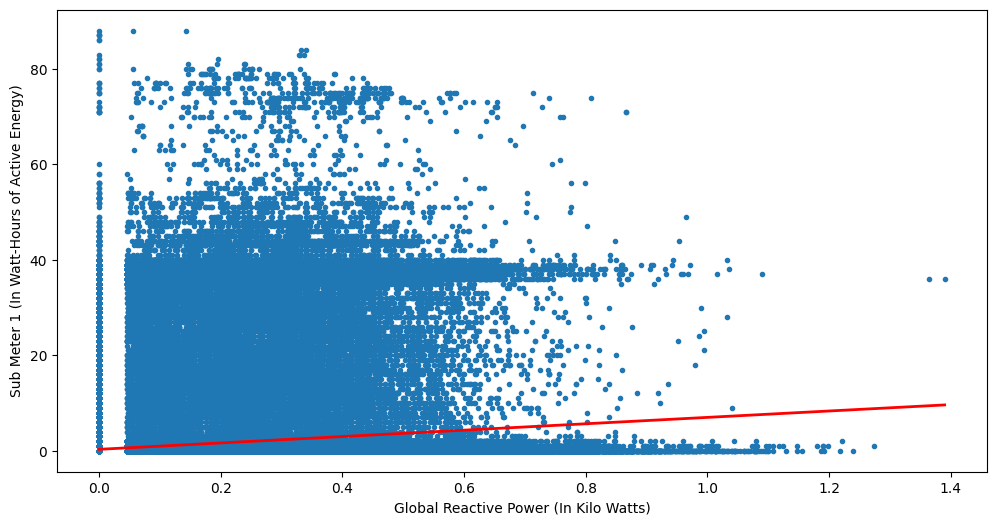

In [120]:
# plot the model fitted line
plt.figure(figsize=(12,6))
prediction_space = np.linspace(min(x_subm1_2), max(x_subm1_2)).reshape(-1,1)
    # constructs a straight line on the graph along with y_predict
    # np.linspace creates sequences of evenly spaced numbers
plt.scatter(x_subm1_2, y_reactive, marker='.')
plt.plot(prediction_space, model.predict(prediction_space), color = 'red', linewidth = 2)
plt.ylabel('Sub Meter 1 (In Watt-Hours of Active Energy)')
plt.xlabel('Global Reactive Power (In Kilo Watts)')
plt.show()

In [121]:
# define dependent and independent variables for global reactive power and sub metering 2
x_subm2_2 = df2['Sub_metering_2']
print(x_subm2_2.shape)

y_reactive = df2['Global_reactive_power']
print(y_reactive.shape)

(2075259, 1)
(2075259,)


In [122]:
# reshape numpy arrays of the x and y to make sure they have one column
# np.array is a collection of values of the same type, indexed by a tuple of nonnegative integers
x_subm2_2 = np.array(x_subm2_2).reshape(-1,1)
print(x_subm2_2.shape)

y_reactive = np.array(y_reactive).reshape(-1,1)
print(y_reactive.shape)

(2075259, 1)
(2075259, 1)


In [123]:
# split data to training- 80% of samples and test- 20% of samples sets
x_train_5, x_test_5, y_train_5, y_test_5 = \
    train_test_split(x_subm2_2, y_reactive, test_size = 0.2, random_state = 5)
            # random_state controls the shuffling process

print(x_train_5.shape)
print(x_test_5.shape)

(1660207, 1)
(415052, 1)


In [125]:
# trains simple model on training set for 1 independent variable
model = LinearRegression()
model.fit(x_train_5, y_train_5) # creates best approximation of the output

LinearRegression()

In [126]:
# mse: closeness of fitted line to the data points; smaller mse = closer fit to data
# rmse: square root of mse; better measure of goodness of fit
# r2: (total variance explained by the model) / total variance; coefficient of determination

# training set: trains the model
# testing set: tests whether the built model is correct or not

# key with creating training and test sets: you're predicting x
# y comes into play when computing for mse

# simple model performance for training set
y_train_predict_5 = model.predict(x_train_5)
mse = mean_squared_error(y_train_5, y_train_predict_5)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_5, y_test_5),2)

print('Simple model performance for training set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for training set:
MSE is: 36.82840792782424
RMSE is: 6.068641357653642
r2 (model) score is: 0.02


In [127]:
# simple model performance for test set
y_pred_5 = model.predict(x_test_5)
mse = mean_squared_error(y_test_5, y_pred_5)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_5, y_test_5),2)

print('Simple model performance for test set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for test set:
MSE is: 36.78242318076951
RMSE is: 6.064851455787645
r2 (model) score is: 0.02


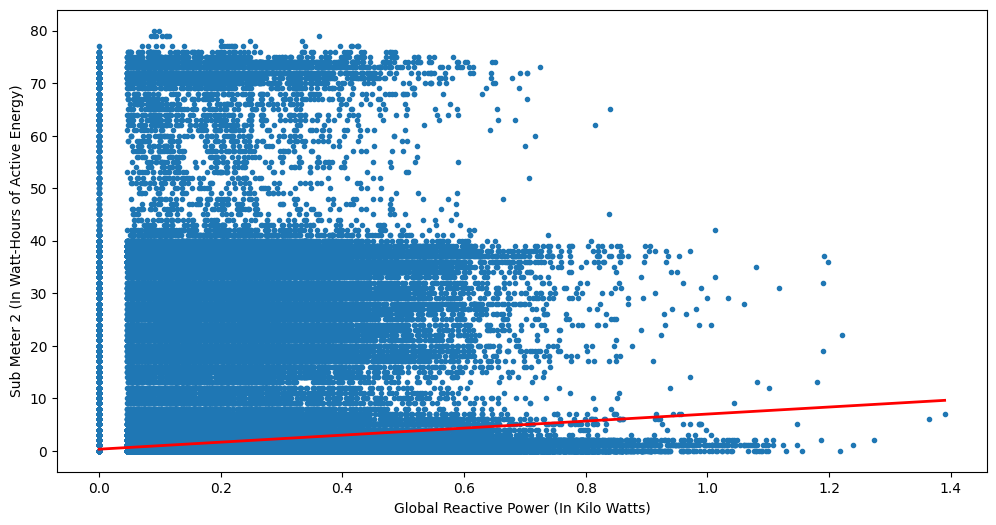

In [128]:
# plot the model fitted line
plt.figure(figsize=(12,6))
prediction_space = np.linspace(min(x_subm2_2), max(x_subm2_2)).reshape(-1,1)
    # constructs a straight line on the graph along with y_predict
    # np.linspace creates sequences of evenly spaced numbers
plt.scatter(x_subm2_2, y_reactive, marker='.')
plt.plot(prediction_space, model.predict(prediction_space), color = 'red', linewidth = 2)
plt.ylabel('Sub Meter 2 (In Watt-Hours of Active Energy)')
plt.xlabel('Global Reactive Power (In Kilo Watts)')
plt.show()

In [134]:
# define dependent and independent variables global reactive power and sub metering 3
x_subm3_2 = df2['Sub_metering_3']
print(x_subm3_2.shape)

y_reactive = df2['Global_reactive_power']
print(y_reactive.shape)

(2075259,)
(2075259,)


In [135]:
# reshape numpy arrays of the x and y to make sure they have one column
# np.array is a collection of values of the same type, indexed by a tuple of nonnegative integers
x_subm3_2 = np.array(x_subm3).reshape(-1,1)
print(x_subm3_2.shape)

y_reactive = np.array(y_reactive).reshape(-1,1)
print(y_reactive.shape)

(2075259, 1)
(2075259, 1)


In [136]:
# split data to training- 80% of samples and test- 20% of samples sets
x_train_6, x_test_6, y_train_6, y_test_6 = \
    train_test_split(x_subm3_2, y_reactive, test_size = 0.2, random_state = 5)
            # random_state controls the shuffling process

print(x_train_6.shape)
print(x_test_6.shape)

(1660207, 1)
(415052, 1)


In [137]:
# trains simple model on training set for 1 independent variable
model = LinearRegression()
model.fit(x_train_6, y_train_6) # creates best approximation of the output

LinearRegression()

In [138]:
# mse: closeness of fitted line to the data points; smaller mse = closer fit to data
# rmse: square root of mse; better measure of goodness of fit
# r2: (total variance explained by the model) / total variance; coefficient of determination

# training set: trains the model
# testing set: tests whether the built model is correct or not

# key with creating training and test sets: you're predicting x
# y comes into play when computing for mse

# simple model performance for training set
y_train_predict_6 = model.predict(x_train_6)
mse = mean_squared_error(y_train_6, y_train_predict_6)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_6, y_test_6),2)

print('Simple model performance for training set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for training set:
MSE is: 69.73246651480694
RMSE is: 8.350596775967988
r2 (model) score is: 0.01


In [139]:
# simple model performance for test set
y_pred_6 = model.predict(x_test_6)
mse = mean_squared_error(y_test_6, y_pred_6)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_6, y_test_6),2)

print('Simple model performance for test set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for test set:
MSE is: 69.7194419487809
RMSE is: 8.349816881152599
r2 (model) score is: 0.01


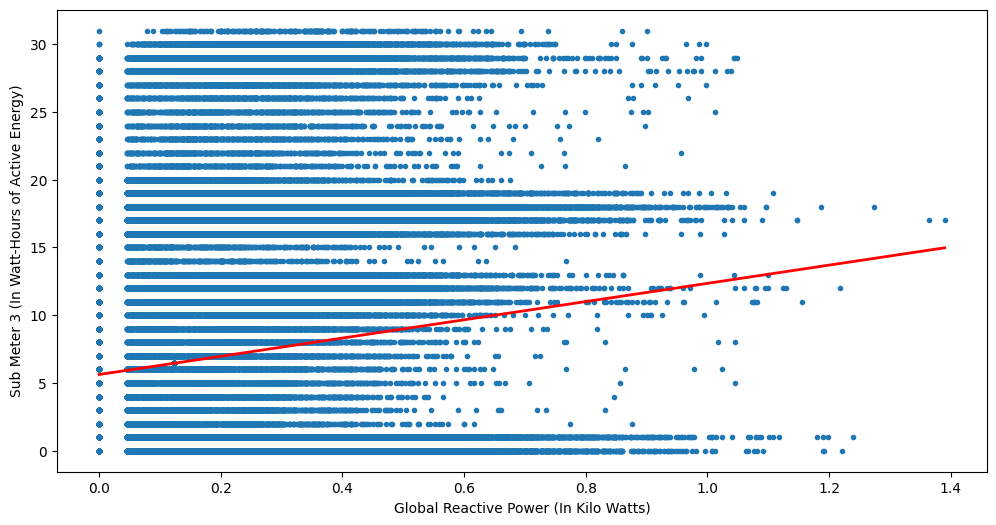

In [141]:
# plot the model fitted line
plt.figure(figsize=(12,6))
prediction_space = np.linspace(min(x_subm3_2), max(x_subm3_2)).reshape(-1,1)
    # constructs a straight line on the graph along with y_predict
    # np.linspace creates sequences of evenly spaced numbers
plt.scatter(x_subm3_2, y_reactive, marker='.')
plt.plot(prediction_space, model.predict(prediction_space), color = 'red', linewidth = 2)
plt.ylabel('Sub Meter 3 (In Watt-Hours of Active Energy)')
plt.xlabel('Global Reactive Power (In Kilo Watts)')
plt.show()